In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
cityDataToLoad = os.path.join("Resources", "city_data.csv")
rideDataToLoad = os.path.join("Resources", "ride_data.csv")

In [4]:
# Read the city data file and store it in a pandas DataFrame.
cityDataDF = pd.read_csv(cityDataToLoad)
cityDataDF.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
rideDataDF = pd.read_csv(rideDataToLoad)
rideDataDF.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# RIDE DATA
# Get total number of rows and columns 
print(cityDataDF.count())
# Get the columns and the rows that are not null.
print(cityDataDF.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


In [7]:
# Get the data types of each column
cityDataDF.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
cityDataDF["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the each city type.
print(sum(cityDataDF["type"] == "Urban"))
print(sum(cityDataDF["type"] == "Suburban"))
print(sum(cityDataDF["type"] == "Rural"))

66
36
18


In [10]:
# RIDE DATA:

# Get total number of rows and columns 
print(rideDataDF.count())
# Get the columns and the rows that are not null.
print(rideDataDF.isnull().sum())


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [11]:
# Get the data types of each column.
rideDataDF.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Combine the data into a single dataset
pyberDataDF = pd.merge(rideDataDF, cityDataDF, on=["city","city"], how="left")
# Display the dataframe
pyberDataDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# **********************************
# BUBLE CHART
# **********************************

# Get Number of Rides for Each City Type
# --------------------------------------------------------------
# Create the Urban, Suburban and Rural city DataFrame.
urbanCitiesDF = pyberDataDF[pyberDataDF["type"] == "Urban"]
suburbanCitiesDF = pyberDataDF[pyberDataDF["type"] == "Suburban"]
ruralCitiesDF = pyberDataDF[pyberDataDF["type"] == "Rural"]
ruralCitiesDF.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [14]:
# Get the number of rides for urban, suburban and rural cities.
urbanRideCount = urbanCitiesDF.groupby("city").count()["ride_id"]
suburbanRideCount = suburbanCitiesDF.groupby("city").count()["ride_id"]
ruralRideCount = ruralCitiesDF.groupby("city").count()["ride_id"]
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [16]:
# Get the Average Fare for Each City Type
# ------------------------------------------------------------------
# Get average fare for each city in each type of city.
urbanAvgFare = urbanCitiesDF.groupby("city").mean()["fare"] 
suburbanAvgFare = suburbanCitiesDF.groupby("city").mean()["fare"] 
ruralAvgFare = ruralCitiesDF.groupby("city").mean()["fare"] 

urbanAvgFare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get the Average Number of Drivers for Each City Type
# --------------------------------------------------------------------
# Get the average number of drivers for each type of city.
urbanDriverCount = urbanCitiesDF.groupby("city").mean()["driver_count"]
suburbanDriverCount = suburbanCitiesDF.groupby("city").mean()["driver_count"]
ruralDriverCount = ruralCitiesDF.groupby("city").mean()["driver_count"]
urbanDriverCount.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

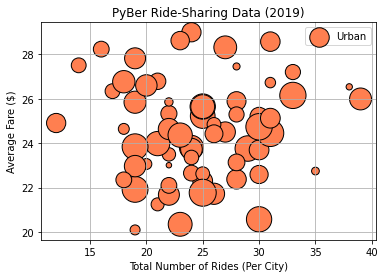

In [31]:
# Individual scatter plot per city type (MATLAB method)
# -----------------------------------------------------
# Build the scatter plots for urban cities.
plt.scatter(urbanRideCount, 
    urbanAvgFare, 
    label="Urban", 
    color="coral", 
    edgecolors="black",
    linewidths=1,
    s=10*urbanDriverCount)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()


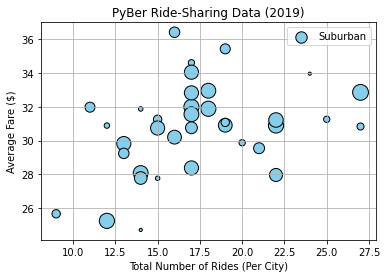

In [32]:
# Build the scatter plots for suburban cities.
plt.scatter(suburbanRideCount, 
    suburbanAvgFare, 
    label="Suburban", 
    color="SkyBlue", 
    edgecolors="black",
    linewidths=1,
    s=10*suburbanDriverCount)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

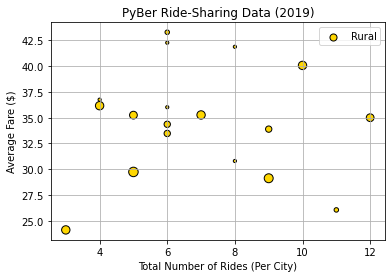

In [33]:
# Build the scatter plots for suburban cities.
plt.scatter(ruralRideCount,
    ruralAvgFare,
    label="Rural",
    color="gold",
    edgecolors="black",
    linewidths=1,
    s=10*ruralDriverCount)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

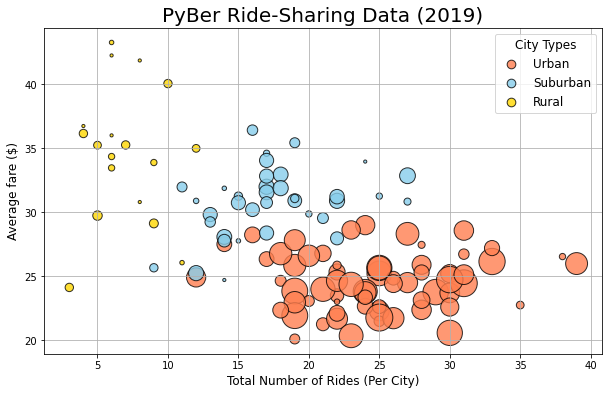

In [46]:
# Combine all three individual buble charts into one
# ---------------------------------------------------------
plt.subplots(figsize=(10,6))
plt.scatter(urbanRideCount, urbanAvgFare, label="Urban",
    color="coral", edgecolors="black", linewidths=1,
    s=10*urbanDriverCount, alpha=0.8)
plt.scatter(suburbanRideCount, suburbanAvgFare, label="Suburban",
    color="SkyBlue", edgecolors="black", linewidths=1,
    s=10*suburbanDriverCount, alpha=0.8)
plt.scatter(ruralRideCount, ruralAvgFare, label="Rural",
    color="gold", edgecolors="black", linewidths=1,
    s=10*ruralDriverCount, alpha=0.8)
# Set title, axes labels and legend and fonts
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average fare ($)", fontsize=12)
plt.grid(True)

# Customize legend (and avoid automatic size)
lgnd = plt.legend(fontsize=12, mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# plt.legend()
# Display the plot
plt.show()